# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\Tru Projects\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

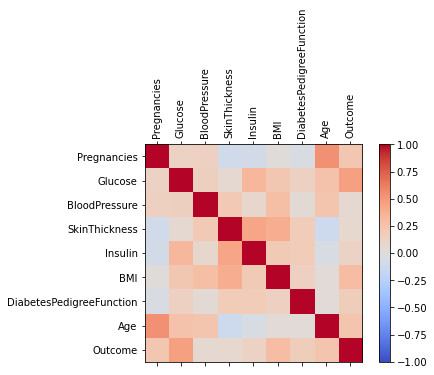

In [5]:
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Features

<AxesSubplot:xlabel='Outcome', ylabel='count'>

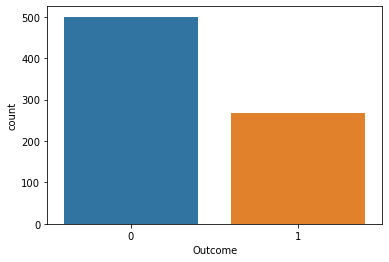

In [9]:
sns.countplot(x = 'Outcome',data = dataset)

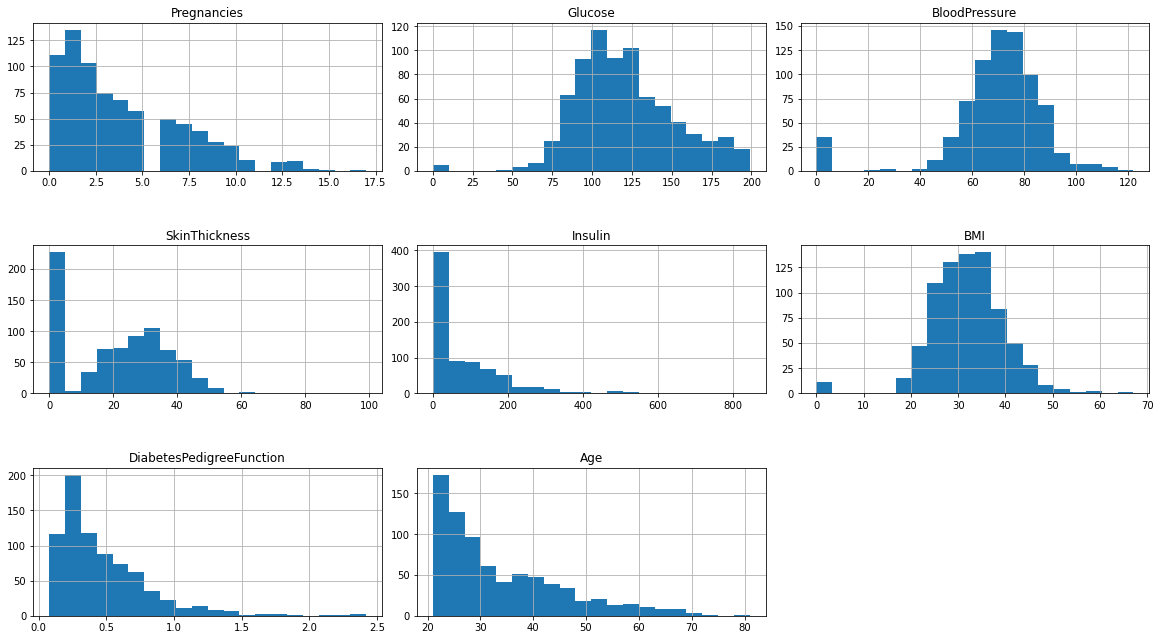

In [10]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

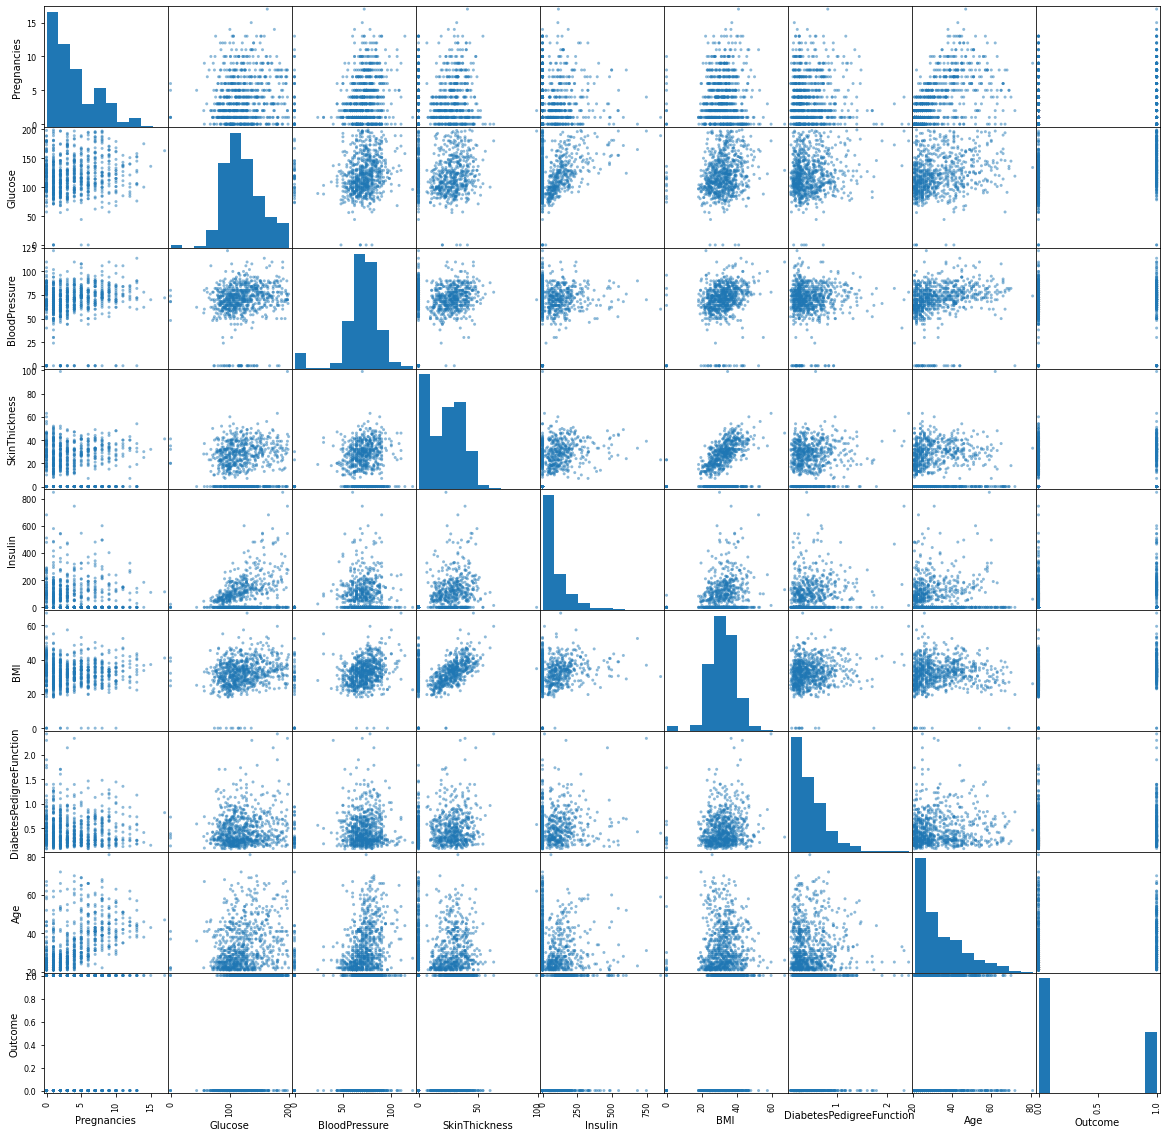

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

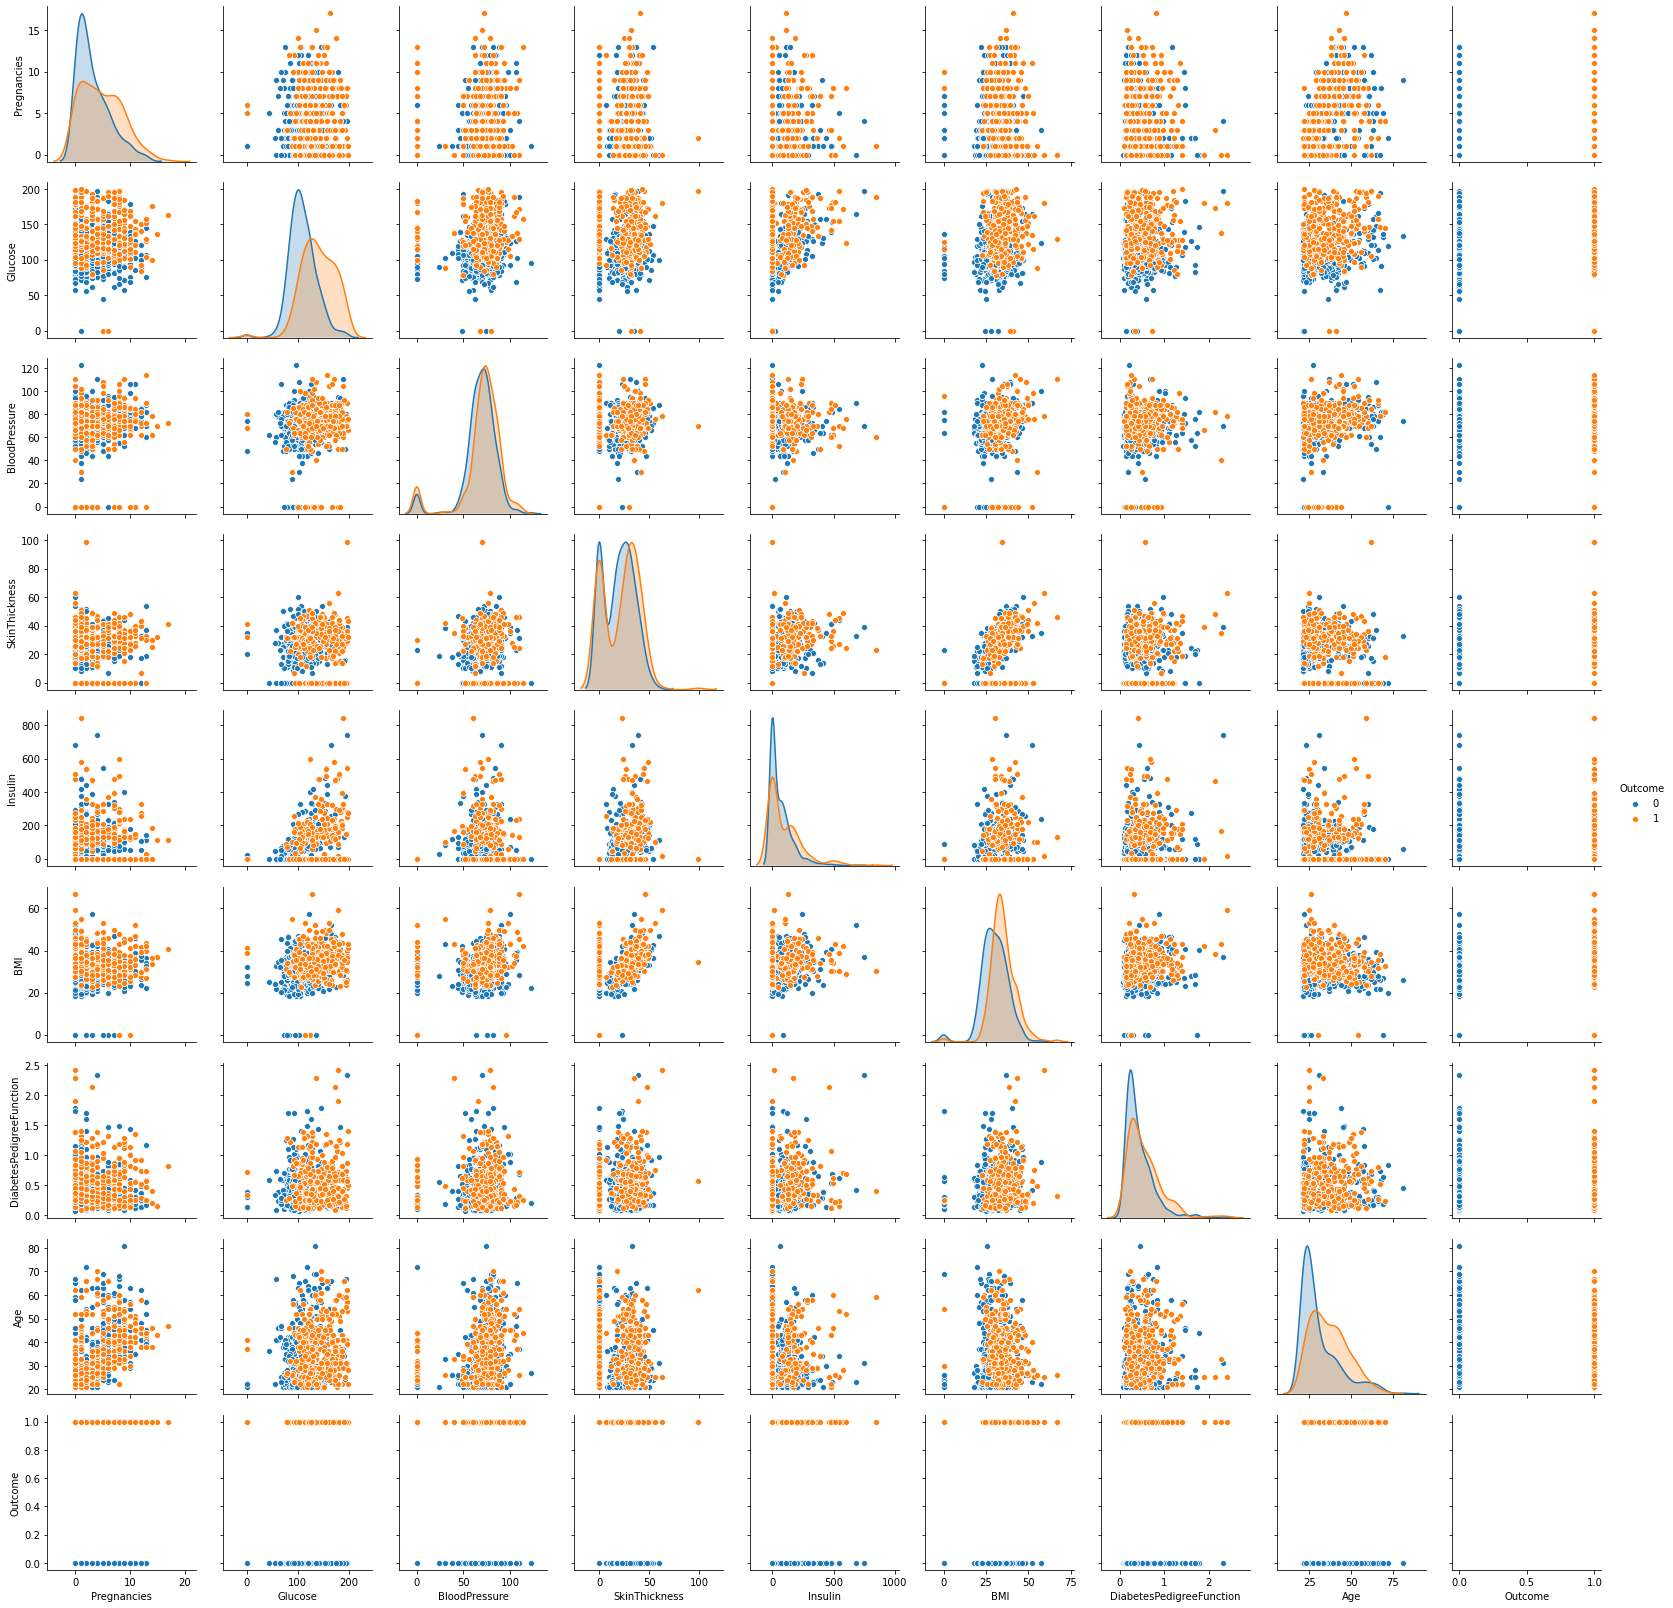

In [12]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

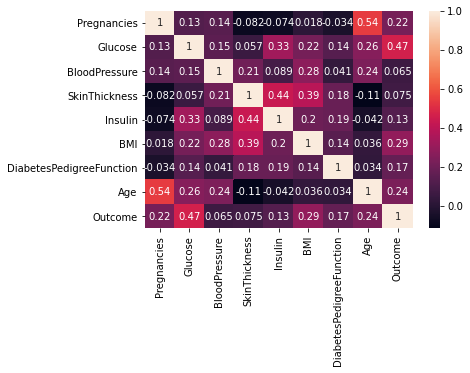

In [13]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Preprocessing

In [14]:
dataset_new = dataset

In [15]:
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Recursive Partition Algorithm

In [16]:
x = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']
X = dataset['Age']

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

[Text(163.88655133928572, 209.6742857142857, 'X[1] <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(70.36238839285714, 194.14285714285714, 'X[7] <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(36.36964285714286, 178.61142857142858, 'X[5] <= 45.4\ngini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(24.24642857142857, 163.07999999999998, 'X[5] <= 30.95\ngini = 0.139\nsamples = 267\nvalue = [247, 20]'),
 Text(7.9714285714285715, 147.54857142857142, 'X[0] <= 7.5\ngini = 0.026\nsamples = 151\nvalue = [149, 2]'),
 Text(5.314285714285714, 132.01714285714286, 'X[6] <= 0.672\ngini = 0.013\nsamples = 150\nvalue = [149, 1]'),
 Text(2.657142857142857, 116.48571428571428, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(7.9714285714285715, 116.48571428571428, 'X[6] <= 0.686\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(5.314285714285714, 100.9542857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.628571428571428, 100.9542857142857, 'gini

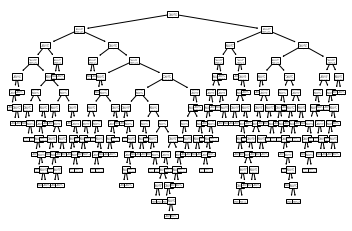

In [18]:
tree.plot_tree(clf)

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 45.40
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |--- feature_6 <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.67
|   |   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_2 <= 53.00
|   |   |   |   |   |   |--- feature_3 <= 10.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  10.50
|   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   | 

# Principal Component Analysis

# Data scaling
PCA requires scaling/normalization of the data to work properly

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

In [24]:
X = scaler.fit_transform(X)

In [25]:
dfx = pd.DataFrame(data=X,columns=dataset.columns[0:8])

In [26]:
dfx.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [27]:
dfx.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


# PCA class import and analysis

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=None)

In [30]:
dfx_pca = pca.fit(dfx)

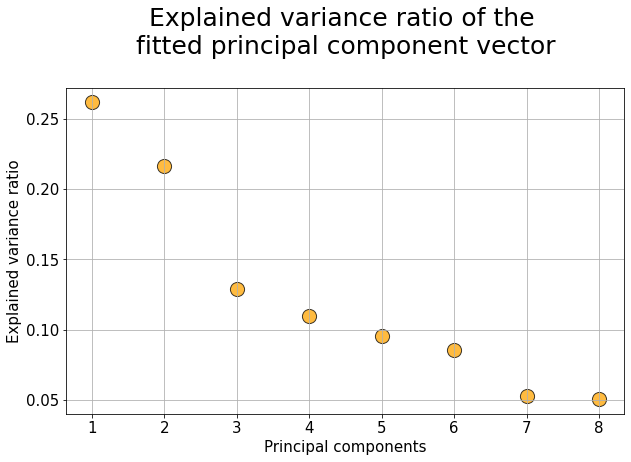

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


In [32]:
dfx_trans = pca.transform(dfx)

In [33]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
5,-1.435751,0.835577,-0.220332,-0.447845,0.443972,-0.409994,-0.610664,-0.038576
6,-0.930176,-1.107940,-0.536578,-0.144660,-1.251691,0.431165,0.235745,-0.075850
7,-2.149806,0.855902,1.254642,-0.638269,-1.234666,3.164384,-0.834773,-0.235251
8,3.297925,-0.242155,1.870861,-3.034595,-1.102779,-1.089537,1.358092,-0.613251
9,-1.839850,3.206661,0.660732,-0.377021,-0.510051,-3.235222,0.190338,0.857041


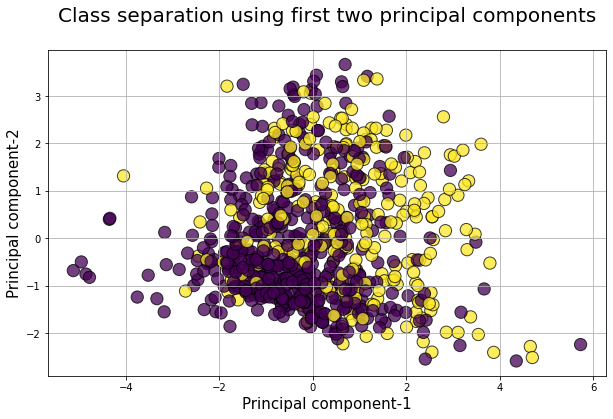

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=dataset['Outcome'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# Accuracy, Sensitivity, and Specificity evaluation with respect to attribute set

# A1, A2, A3, A4

In [35]:
X = dfx_trans.iloc[:,[0,1,2,3]].values
Y = dataset.iloc[:,8].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [38]:
from sklearn.neighbors import KNeighborsClassifier
gnb = KNeighborsClassifier(n_neighbors=100)
gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [39]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[338  20]
 [124  55]]
ACCURACY SCORE:
0.7318
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.731602    0.733333  0.731844    0.732468      0.732179
recall       0.944134    0.307263  0.731844    0.625698      0.731844
f1-score     0.824390    0.433071  0.731844    0.628731      0.693950
support    358.000000  179.000000  0.731844  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[134   8]
 [ 66  23]]
ACCURACY SCORE:
0.6797
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.670000   0.741935  0.679654    0.705968      0.697715
recall       0.943662   0.258427  0.679654    0.601044      0.679654
f1-score     0.783626   0.383333  0.679654    0.583480      0.629401
support    142.000000  89.000000  0.679654  231.000000    231.000000


# A1, A2, A3, A4,A6 

In [40]:
X = dfx_trans.iloc[:,[0,1,2,3,5]].values
Y = dataset.iloc[:,8].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [42]:

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [43]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[323  24]
 [122  68]]
ACCURACY SCORE:
0.7281
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.725843    0.739130  0.728119    0.732487      0.730544
recall       0.930836    0.357895  0.728119    0.644365      0.728119
f1-score     0.815657    0.482270  0.728119    0.648963      0.697698
support    347.000000  190.000000  0.728119  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[142  11]
 [ 50  28]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.739583   0.717949  0.735931    0.728766      0.732278
recall       0.928105   0.358974  0.735931    0.643539      0.735931
f1-score     0.823188   0.478632  0.735931    0.650910      0.706845
support    153.000000  78.000000  0.735931  231.000000    231.000000


# A1, A2, A3, A4,A5, A6 

In [44]:
X = dfx_trans.iloc[:,[0,1,2,3,4,5]].values
Y = dataset.iloc[:,8].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [46]:

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [47]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[332  16]
 [132  57]]
ACCURACY SCORE:
0.7244
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.715517    0.780822  0.724395    0.748170      0.738502
recall       0.954023    0.301587  0.724395    0.627805      0.724395
f1-score     0.817734    0.435115  0.724395    0.626424      0.683069
support    348.000000  189.000000  0.724395  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[143   9]
 [ 50  29]]
ACCURACY SCORE:
0.7446
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.740933   0.763158  0.744589    0.752045      0.748533
recall       0.940789   0.367089  0.744589    0.653939      0.744589
f1-score     0.828986   0.495726  0.744589    0.662356      0.715014
support    152.000000  79.000000  0.744589  231.000000    231.000000


# A2, A4, A5, A6,A8

In [48]:
X = dfx_trans.iloc[:,[1,3,4,5,7]].values
Y = dataset.iloc[:,8].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [50]:

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [51]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[348   1]
 [173  15]]
ACCURACY SCORE:
0.6760
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.667946    0.937500  0.675978    0.802723      0.762315
recall       0.997135    0.079787  0.675978    0.538461      0.675978
f1-score     0.800000    0.147059  0.675978    0.473529      0.571410
support    349.000000  188.000000  0.675978  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[151   0]
 [ 77   3]]
ACCURACY SCORE:
0.6667
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.662281   1.000000  0.666667    0.831140      0.779240
recall       1.000000   0.037500  0.666667    0.518750      0.666667
f1-score     0.796834   0.072289  0.666667    0.434561      0.545909
support    151.000000  80.000000  0.666667  231.000000    231.000000


# A1, A2, A3, A7

In [52]:
X = dfx_trans.iloc[:,[0,1,2,6]].values
Y = dataset.iloc[:,8].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [54]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[328  30]
 [117  62]]
ACCURACY SCORE:
0.7263
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.737079    0.673913  0.726257    0.705496      0.716023
recall       0.916201    0.346369  0.726257    0.631285      0.726257
f1-score     0.816936    0.457565  0.726257    0.637251      0.697146
support    358.000000  179.000000  0.726257  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[136   6]
 [ 57  32]]
ACCURACY SCORE:
0.7273
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.704663   0.842105  0.727273    0.773384      0.757617
recall       0.957746   0.359551  0.727273    0.658649      0.727273
f1-score     0.811940   0.503937  0.727273    0.657939      0.693272
support    142.000000  89.000000  0.727273  231.000000    231.000000


# A1, A2, A3, A4,A5, A6, A7, A8

In [55]:
X = dfx_trans.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [57]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[343  10]
 [141  43]]
ACCURACY SCORE:
0.7188
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.708678    0.811321  0.718808    0.759999      0.743848
recall       0.971671    0.233696  0.718808    0.602684      0.718808
f1-score     0.819594    0.362869  0.718808    0.591231      0.663100
support    353.000000  184.000000  0.718808  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[143   4]
 [ 65  19]]
ACCURACY SCORE:
0.7013
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.687500   0.826087  0.701299    0.756793      0.737895
recall       0.972789   0.226190  0.701299    0.599490      0.701299
f1-score     0.805634   0.355140  0.701299    0.580387      0.641818
support    147.000000  84.000000  0.701299  231.000000    231.000000


# Full attribute set

In [58]:
X = dfx_trans.values
Y = dataset.iloc[:,8].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [60]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[320  21]
 [130  66]]
ACCURACY SCORE:
0.7188
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.711111    0.758621  0.718808    0.734866      0.728452
recall       0.938416    0.336735  0.718808    0.637576      0.718808
f1-score     0.809102    0.466431  0.718808    0.637767      0.684031
support    341.000000  196.000000  0.718808  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[153   6]
 [ 36  36]]
ACCURACY SCORE:
0.8182
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809524   0.857143  0.818182    0.833333      0.824366
recall       0.962264   0.500000  0.818182    0.731132      0.818182
f1-score     0.879310   0.631579  0.818182    0.755445      0.802095
support    159.000000  72.000000  0.818182  231.000000    231.000000


# A8

In [61]:
X = dfx_trans.iloc[:,[7]].values
Y = dataset.iloc[:,8].values

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [63]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [188   0]]
ACCURACY SCORE:
0.6499
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.649907    0.0  0.649907    0.324953      0.422379
recall       1.000000    0.0  0.649907    0.500000      0.649907
f1-score     0.787810    0.0  0.649907    0.393905      0.512003
support    349.000000  188.0  0.649907  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[151   0]
 [ 80   0]]
ACCURACY SCORE:
0.6537
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.653680   0.0   0.65368    0.326840      0.427297
recall       1.000000   0.0   0.65368    0.500000      0.653680
f1-score     0.790576   0.0   0.65368    0.395288      0.516783
support    151.000000  80.0   0.65368  231.000000    231.000000


# A7,A8

In [64]:
X = dfx_trans.iloc[:,[6,7]].values
Y = dataset.iloc[:,8].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [66]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   2]
 [186   7]]
ACCURACY SCORE:
0.6499
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.647727    0.777778  0.649907    0.712753      0.694468
recall       0.994186    0.036269  0.649907    0.515228      0.649907
f1-score     0.784404    0.069307  0.649907    0.426855      0.527395
support    344.000000  193.000000  0.649907  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[156   0]
 [ 73   2]]
ACCURACY SCORE:
0.6840
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.681223   1.000000  0.683983    0.840611      0.784722
recall       1.000000   0.026667  0.683983    0.513333      0.683983
f1-score     0.810390   0.051948  0.683983    0.431169      0.564142
support    156.000000  75.000000  0.683983  231.000000    231.000000


# A6,A7,A8

In [67]:
X = dfx_trans.iloc[:,[5,6,7]].values
Y = dataset.iloc[:,8].values

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [69]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[347   6]
 [173  11]]
ACCURACY SCORE:
0.6667
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.667308    0.647059  0.666667    0.657183      0.660370
recall       0.983003    0.059783  0.666667    0.521393      0.666667
f1-score     0.794960    0.109453  0.666667    0.452206      0.560075
support    353.000000  184.000000  0.666667  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[146   1]
 [ 79   5]]
ACCURACY SCORE:
0.6537
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.648889   0.833333   0.65368    0.741111      0.715960
recall       0.993197   0.059524   0.65368    0.526361      0.653680
f1-score     0.784946   0.111111   0.65368    0.448029      0.539915
support    147.000000  84.000000   0.65368  231.000000    231.000000


# A5,A6,A7,A8 

In [70]:
X = dfx_trans.iloc[:,[4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [72]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   1]
 [174  20]]
ACCURACY SCORE:
0.6741
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.662791    0.952381  0.674115    0.807586      0.767410
recall       0.997085    0.103093  0.674115    0.550089      0.674115
f1-score     0.796275    0.186047  0.674115    0.491161      0.575820
support    343.000000  194.000000  0.674115  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[156   1]
 [ 69   5]]
ACCURACY SCORE:
0.6970
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.693333   0.833333   0.69697    0.763333      0.738182
recall       0.993631   0.067568   0.69697    0.530599      0.696970
f1-score     0.816754   0.125000   0.69697    0.470877      0.595153
support    157.000000  74.000000   0.69697  231.000000    231.000000


# A4,A5,A6,A7,A8

In [73]:
X = dfx_trans.iloc[:,[3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [75]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[345   0]
 [182  10]]
ACCURACY SCORE:
0.6611
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.654649    1.000000   0.66108    0.827324      0.778126
recall       1.000000    0.052083   0.66108    0.526042      0.661080
f1-score     0.791284    0.099010   0.66108    0.445147      0.543767
support    345.000000  192.000000   0.66108  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[154   1]
 [ 73   3]]
ACCURACY SCORE:
0.6797
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.678414   0.750000  0.679654    0.714207      0.701966
recall       0.993548   0.039474  0.679654    0.516511      0.679654
f1-score     0.806283   0.075000  0.679654    0.440641      0.565688
support    155.000000  76.000000  0.679654  231.000000    231.000000


# A3,A4,A5,A6,A7,A8

In [76]:
X = dfx_trans.iloc[:,[2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [78]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[355   1]
 [172   9]]
ACCURACY SCORE:
0.6778
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.673624    0.900000   0.67784    0.786812      0.749926
recall       0.997191    0.049724   0.67784    0.523457      0.677840
f1-score     0.804077    0.094241   0.67784    0.449159      0.564821
support    356.000000  181.000000   0.67784  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[144   0]
 [ 84   3]]
ACCURACY SCORE:
0.6364
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.631579   1.000000  0.636364    0.815789      0.770335
recall       1.000000   0.034483  0.636364    0.517241      0.636364
f1-score     0.774194   0.066667  0.636364    0.420430      0.507722
support    144.000000  87.000000  0.636364  231.000000    231.000000


# A2,A3,A4,A5,A6,A7,A8

In [79]:
X = dfx_trans.iloc[:,[1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [81]:
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[356   4]
 [164  13]]
ACCURACY SCORE:
0.6872
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.684615    0.764706  0.687151    0.724661      0.711014
recall       0.988889    0.073446  0.687151    0.531168      0.687151
f1-score     0.809091    0.134021  0.687151    0.471556      0.586582
support    360.000000  177.000000  0.687151  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[139   1]
 [ 86   5]]
ACCURACY SCORE:
0.6234
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.617778   0.833333  0.623377    0.725556      0.702694
recall       0.992857   0.054945  0.623377    0.523901      0.623377
f1-score     0.761644   0.103093  0.623377    0.432368      0.502215
support    140.000000  91.000000  0.623377  231.000000    231.000000


# Data Modelling

# Naïve Bayes

In [82]:
x = dfx_trans.values
y = dataset.iloc[:,8].values

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [85]:
gnb.fit(x_train, y_train)

GaussianNB()

In [86]:
evaluate(gnb, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[289  59]
 [ 92  97]]
ACCURACY SCORE:
0.7188
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.758530    0.621795  0.718808    0.690163      0.710405
recall       0.830460    0.513228  0.718808    0.671844      0.718808
f1-score     0.792867    0.562319  0.718808    0.677593      0.711724
support    348.000000  189.000000  0.718808  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[131  21]
 [ 32  47]]
ACCURACY SCORE:
0.7706
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.803681   0.691176  0.770563    0.747429      0.765205
recall       0.861842   0.594937  0.770563    0.728389      0.770563
f1-score     0.831746   0.639456  0.770563    0.735601      0.765984
support    152.000000  79.000000  0.770563  231.000000    231.000000


In [87]:
y_pred_gnb = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_gnb)
cm
gnb_result = accuracy_score(y_test,y_pred_gnb)
print("Accuracy :",gnb_result)
recall_gnb = cm[0][0]/(cm[0][0] + cm[0][1])
precision_gnb = cm[0][0]/(cm[0][0]+cm[1][1])
recall_gnb,precision_gnb

Accuracy : 0.7705627705627706


(0.8618421052631579, 0.7359550561797753)

# SVM

In [88]:
from sklearn import svm
svm = svm.SVC()

In [89]:
svm.fit(x_train, y_train)

SVC()

In [90]:
evaluate(svm, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[324  24]
 [ 66 123]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.830769    0.836735  0.832402    0.833752      0.832869
recall       0.931034    0.650794  0.832402    0.790914      0.832402
f1-score     0.878049    0.732143  0.832402    0.805096      0.826696
support    348.000000  189.000000  0.832402  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[129  23]
 [ 30  49]]
ACCURACY SCORE:
0.7706
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.811321   0.680556  0.770563    0.745938      0.766600
recall       0.848684   0.620253  0.770563    0.734469      0.770563
f1-score     0.829582   0.649007  0.770563    0.739294      0.767827
support    152.000000  79.000000  0.770563  231.000000    231.000000


In [91]:
y_pred_svm = svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm

Accuracy : 0.7705627705627706


(0.8486842105263158, 0.7247191011235955)

# Decision Tree

In [92]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [93]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [94]:
evaluate(dt, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[348   0]
 [  0 189]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    348.0  189.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[109  43]
 [ 39  40]]
ACCURACY SCORE:
0.6450
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.736486   0.481928  0.645022    0.609207      0.649430
recall       0.717105   0.506329  0.645022    0.611717      0.645022
f1-score     0.726667   0.493827  0.645022    0.610247      0.647038
support    152.000000  79.000000  0.645022  231.000000    231.000000


In [95]:
y_pred_dt = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
cm
dt_result = accuracy_score(y_test,y_pred_dt)
print("Accuracy :",dt_result)
recall_dt = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dt = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dt,precision_dt

Accuracy : 0.645021645021645


(0.7171052631578947, 0.7315436241610739)

# Random Forest Classification

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
RF = RandomForestClassifier(max_depth=2, random_state=0)

In [98]:
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [99]:
evaluate(RF, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   6]
 [135  54]]
ACCURACY SCORE:
0.7374
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.716981    0.900000   0.73743    0.808491      0.781396
recall       0.982759    0.285714   0.73743    0.634236      0.737430
f1-score     0.829091    0.433735   0.73743    0.631413      0.689943
support    348.000000  189.000000   0.73743  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[151   1]
 [ 59  20]]
ACCURACY SCORE:
0.7403
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.719048   0.952381   0.74026    0.835714      0.798846
recall       0.993421   0.253165   0.74026    0.623293      0.740260
f1-score     0.834254   0.400000   0.74026    0.617127      0.685743
support    152.000000  79.000000   0.74026  231.000000    231.000000


In [100]:
y_pred_rf = RF.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.7402597402597403


(0.993421052631579, 0.8830409356725146)

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=100)
from sklearn.model_selection import cross_val_score

In [102]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [103]:
evaluate(KNN, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[333  15]
 [144  45]]
ACCURACY SCORE:
0.7039
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.698113    0.750000  0.703911    0.724057      0.716375
recall       0.956897    0.238095  0.703911    0.597496      0.703911
f1-score     0.807273    0.361446  0.703911    0.584359      0.650362
support    348.000000  189.000000  0.703911  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[149   3]
 [ 54  25]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.733990   0.892857  0.753247    0.813424      0.788321
recall       0.980263   0.316456  0.753247    0.648359      0.753247
f1-score     0.839437   0.467290  0.753247    0.653363      0.712166
support    152.000000  79.000000  0.753247  231.000000    231.000000


In [104]:
y_pred_knn = KNN.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.7532467532467533


(0.9802631578947368, 0.8563218390804598)

# Model Comparsion

In [105]:
results ={'Accuracy': [svm_result*100,rf_result*100,dt_result*100,knn_result*100,gnb_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_dt*100,recall_knn*100,recall_gnb*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_dt*100,precision_knn*100,precision_gnb*100]}
index = ['Suport Vector Machine','Random Forest','Decision Tree','KNNeighbors','Naive Bayes Classifier']

In [106]:
results =pd.DataFrame(results,index=index)

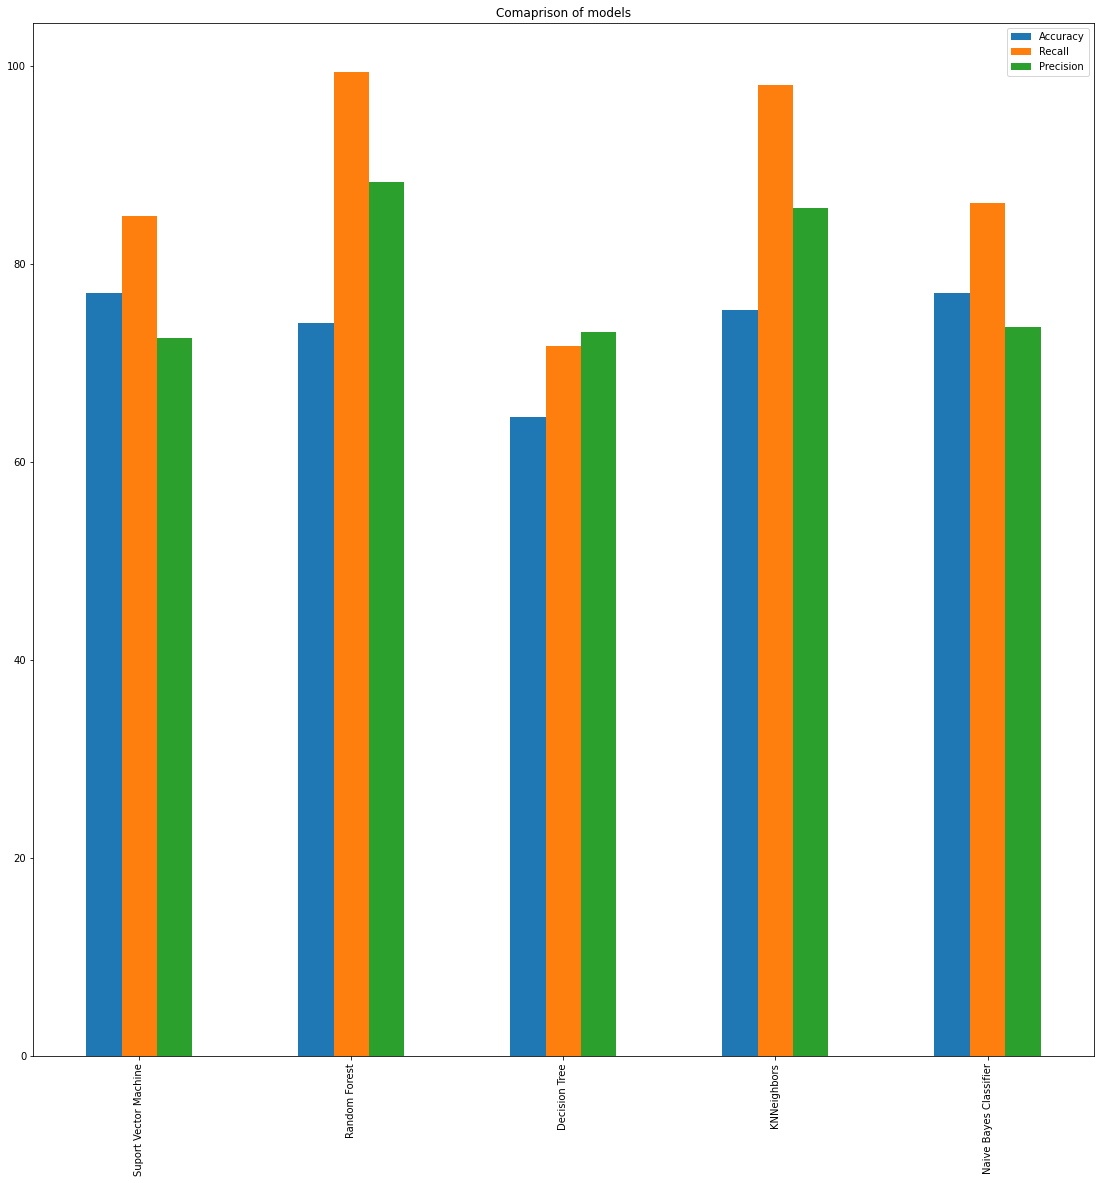

In [107]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<AxesSubplot:title={'center':'Accuracy'}>,
       <AxesSubplot:title={'center':'Recall'}>,
       <AxesSubplot:title={'center':'Precision'}>], dtype=object)

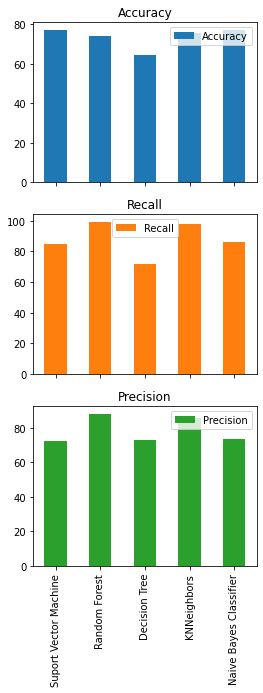

In [108]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))